#Stocktwits

In [ ]:
#@title installere chromium, driver, og selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
# set options to be headless, ..
from selenium import webdriver

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backpor

In [ ]:
#@title installere selenium og initialisere webscraper
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
browser = webdriver.Chrome('chromedriver',options=options)
browser.get("https://api.stocktwits.com/api/2/symbols/RTP/sentiment.json")
print(browser.page_source)  # results

<html><head></head><body><pre style="word-wrap: break-word; white-space: pre-wrap;">{"response":{"status":200},"data":[{"bullish":97.33,"bearish":2.67,"timestamp":"2021-04-23"},{"bullish":97.44,"bearish":2.56,"timestamp":"2021-04-22"},{"bullish":97.5,"bearish":2.5,"timestamp":"2021-04-21"},{"bullish":97.53,"bearish":2.47,"timestamp":"2021-04-20"},{"bullish":97.73,"bearish":2.27,"timestamp":"2021-04-19"},{"bullish":98.88,"bearish":1.12,"timestamp":"2021-04-18"},{"bullish":98.86,"bearish":1.14,"timestamp":"2021-04-17"},{"bullish":98.91,"bearish":1.09,"timestamp":"2021-04-16"},{"bullish":97.14,"bearish":2.86,"timestamp":"2021-04-15"},{"bullish":96.26,"bearish":3.74,"timestamp":"2021-04-14"},{"bullish":95.15,"bearish":4.85,"timestamp":"2021-04-13"},{"bullish":94.85,"bearish":5.15,"timestamp":"2021-04-12"},{"bullish":94.79,"bearish":5.21,"timestamp":"2021-04-11"},{"bullish":95.1,"bearish":4.9,"timestamp":"2021-04-10"},{"bullish":94.9,"bearish":5.1,"timestamp":"2021-04-09"},{"bullish":96.84,

#Sentiment

In [ ]:
import pandas as pd
data=pd.read_json(str(browser.page_source).split("data\":")[1].split("}</pre></body></html>")[0])
data

,bullish,bearish,timestamp
0,97.33,2.67,2021-04-23
1,97.44,2.56,2021-04-22
2,97.50,2.50,2021-04-21
3,97.53,2.47,2021-04-20
4,97.73,2.27,2021-04-19
...,...,...,...
56,95.48,4.52,2021-02-26
57,95.06,4.94,2021-02-25
58,94.59,5.41,2021-02-24
59,99.61,0.39,2021-02-23


In [ ]:
import altair as alt

alt.Chart(data.dropna()).transform_fold(["bullish","bearish"]).mark_line().encode(
    x="timestamp:T",
    y='value:Q',
    color="key:N"

)

alt.Chart(...)

#Volume

In [ ]:
browser.get("https://api.stocktwits.com/api/2/symbols/ABB/volume.json")

In [ ]:
vol_data=pd.read_json(str(browser.page_source).split("data\":")[1].split("}</pre></body></html>")[0])
vol_data

#Price

In [ ]:
browser.get("https://ql.stocktwits.com/chart?symbol=ABB&zoom=3m")

In [ ]:
pd.read_json(str(browser.page_source).split("pre-wrap;\">")[1].split("</pre></body></html>")[0])

,Volume,Last,High,Low,Date,Open
0,2030550,29.257199,29.412771,28.994672,2021-01-25,29.276646
1,1797259,29.675298,29.772531,29.325262,2021-01-26,29.412771
2,3142152,28.994672,29.266923,28.644636,2021-01-27,28.897440
3,1939743,29.315539,29.490557,29.121074,2021-01-28,29.159967
4,2483652,28.693252,29.087043,28.547404,2021-01-29,29.043288
...,...,...,...,...,...,...
58,1322847,33.240000,33.440000,33.070000,2021-04-19,33.430000
59,1080797,32.590000,33.015000,32.455000,2021-04-20,32.970000
60,1280925,32.740000,32.750000,32.190000,2021-04-21,32.280000
61,1821909,32.320000,32.560000,32.245000,2021-04-22,32.540000


#Hent heat map data for en batch af aksjer

In [ ]:
url="https://ql.stocktwits.com/batch?symbols=AAL%2CAAPL%2CACB%2CADA.X%2CAMC%2CAMD%2CAMZN%2CATNX%2CATOS%2CBA%2CBABA%2CBAC%2CBB%2CBIOC%2CBKR%2CBNGO%2CBRK.A%2CBTC.X%2CBYND%2CCCIV%2CCCL%2CCELR.X%2CCGC%2CCHKAQ%2CCM%2CCOPX%2CCRMD%2CCRON%2CCTRM%2CDAL%2CDIA%2CDIS%2CDJIA%2CDK%2CDKNG%2CDOGE.X%2CETH.X%2CF%2CFB%2CFCEL%2CFSR%2CGE%2CGEVO%2CGILD%2CGLD%2CGME%2CGNUS%2CGOOG%2CGOOGL%2CGPRO%2CHCMC%2CIBIO%2CIDEX%2CIEP%2CIIPR%2CINO%2CINPX%2CINSM%2CINTC%2CITA%2CJAGX%2CJNJ%2CJNUG%2CJPM%2CKGC%2CLASR%2CLTC.X%2CLUMN%2CMANU%2CMARA%2CMMC%2CMRNA%2CMSFT%2CMU%2CMVIS%2CMX%2CNAKD%2CNFLX%2CNIO%2CNKE%2CNKLA%2CNNDM%2CNOK%2CNVAX%2CNVDA%2COCGN%2CPFE%2CPLTR%2CPLUG%2CPYPL%2CQQQ%2CREGI%2CRIOT%2CROKU%2CRTP%2CRVLV%2CSBUX%2CSHOP%2CSNAP%2CSNDL%2CSOS%2CSPCE%2CSPX%2CSPY%2CSQ%2CSRNE%2CSRNGU%2CT%2CTLRY%2CTNXP%2CTOPS%2CTSLA%2CTWTR%2CUBER%2CUSO%2CUUP%2CUVXY%2CV%2CVISL%2CVXRT%2CWEN%2CWKHS%2CWMT%2CXEC%2CXLNX%2CXOM%2CXRP.X%2CXSPA%2CZOM"

In [ ]:

browser.get(url)

In [ ]:
((str(browser.page_source).split("pre-wrap;\">")[1]).split("}</pre></body></html>")[0])

'{"NFLX":{"High":509.67,"Open":509.145,"ExtendedHoursChange":0.0,"Last":502.03,"ExtendedHoursPrice":0.0,"EasternDateTime":"04/23/2021, 11:14:25 AM EDT","PreviousClose":508.78,"Symbol":"NFLX","PreviousCloseDate":"2021-04-22","DateTime":"2021-04-23 15:14:25","Volume":2021884.0,"LastSize":"7","Low":501.23,"PercentChange":-1.327,"ExtendedHoursPercentChange":0.0,"Outcome":"Success","Type":"equity","Change":-6.75},"BA":{"High":236.19,"Open":233.84,"ExtendedHoursChange":0.0,"Last":235.31,"ExtendedHoursPrice":0.0,"EasternDateTime":"04/23/2021, 11:14:29 AM EDT","PreviousClose":234.33,"Symbol":"BA","PreviousCloseDate":"2021-04-22","DateTime":"2021-04-23 15:14:29","Volume":4592123.0,"LastSize":"11","Low":233.08,"PercentChange":0.418,"ExtendedHoursPercentChange":0.0,"Outcome":"Success","Type":"equity","Change":0.98},"BB":{"High":8.84,"Open":8.66,"ExtendedHoursChange":0.0,"Last":8.71,"ExtendedHoursPrice":0.0,"EasternDateTime":"04/23/2021, 11:14:24 AM EDT","PreviousClose":8.64,"Symbol":"BB","Previou

#For 24 timer

In [ ]:
browser.get("https://api.stocktwits.com/api/2/heatmap/sectors.json?range=twentyfour")


#Flere sentiment for flere aksjer

In [ ]:
tickers=["AAU","AXU","DNN","EGO","EXK","GBR","GSS","GSX","GTE","IMO","CEI","MAG","NAK","NGD","NOG","PLG","PLM","SVM","TGB","TGC","TRX","UEC","URG","VGZ","ZNOG","ARLP","AXAS","BCPC","GRBK","CENX","CHNR","CLMT","COIN","GOLD","GPORQ","HERO","HUSA","YTEN","TELL","NWPX","PAAS","ALTO","PDCE","PTEN","RGLD","STLD","WWR","AA","ABX","ACH","ACI","AEM","AG","ALB","APA","ASH","AUY","BAS","HPR","BBL","BHP","BP","BPT","BTU","BVN","CCJ","CDE","CE","CEO","CF","CHKAQ","CLB","CLF","CLR","CMC","CNQ","COG","COP","CPE","CRK","CVX","CXO","DD","DK","DO","DOW","DRQ","DVN","OVV","EMN","ENB","EOG","EPD","ERF","FCX","FMC","FST","FTI","GFI","HAL","HES","HL","HLX","HMY","HFC","HP","HSC","HUN","IAG","IFF","INT","IPI","TRQ","KGC","KOS","KRO","ME","MOS","MRO","MT","MTL","MTX","NBR","NEM","NEU","NGS","NOV","NR","NUE","ODC","OLN","OMG","OXY","PAA","PBR","SCCO","PKX","PTR","PXD","RES","RIG","RIO","RRC","SE","SHW","SID","SJT","SLB","WPM","SM","SMG","SPN","SQM","SU","SUN","SWN","TECK","TTI","TX","UGP","VAL","VALE","VLO","WES","WH","WLK","WLL","WMB","WTI","X","XEC","XOM","YPF","PBR.A","RCON","GSM","LTBR","KRA","AMCF","NEP","CGC","CVE","MUSA","OAS","QEP","KGJI","GORO","AMRS","AUMN","KMI","GPL","GEVO","VOC","NGL","MPC","ASM","FNV","FSM","GNE","LODE","PACD","SXC","LPI","BCEI","REGI","PSX","MUX","UGLD","FET","SAND","PBF","MTDR","PVG","MPLX","ACU","BTN","CRC","DLA","EVK","UG","AMWD","JAN","BEST","CAAS","CHTT","COKE","COLM","CRESY","CROX","CTIB","CVGW","FARM","VERU","FOSL","GIII","MNST","HELE","HOFT","IPAR","JAKK","JOUT","JSDA","KNDI","KOSS","LCUT","LKQ","LULU","MERC","MGPI","POOL","RCKY","REED","SNBR","SENEB","SHLO","SHOO","STKL","WPRT","ABEV","ADM","ALV","ATR","BF.B","BG","BGS","BLL","BUD","CAG","UTZ","CHD","CL","CLW","CLX","TPR","CPB","CRI","CSL","CTB","DAN","DEO","KDP","EBF","KODK","EL","ELY","ETH","F","FDP","FL","FMX","FN","FSS","GEF","GIL","GPK","GT","HAS","HBI","HOG","HRL","IP","JCI","K","KO","KOF","LEA","LZB","MAT","MKC","MLR","MO","MOV","MYE","NAV","NKE","NLS","NWL","OME","OSK","PBI","PEP","PG","PII","PM","PVH","REV","RKT","RL","SKX","SNE","SRI","STZ","SUP","SWM","TAP","TEN","TG","THO","THS","TM","TPX","TR","TSN","TUP","UAA","UFS","UL","UN","VFC","VGR","WGO","WWW","BRFS","ITP","PPC","CELH","SANW","TSLA","VRA","GM","PRMW","AGRO","BEAM","POST","MANU","MDLZ","BERY","ACY","BKR","CNR","DSS","COGT","LOV","MBA","NTN","TA","UUU","XPO","ARCB","ACMR","ACTG","AMZN","AACG","BASI","BBBY","BBSI","BFLY","BGFV","BJRI","BLDR","CAKE","CCRN","CHRS","CHRW","CHTR","CIDM","CMCSA","CMLS","CONN","COSI","COST","CPRT","CTHR","CTRN","TCOM","BBQ","DENN","DISCA","DISH","DLTR","EBAY","EEFT","EGLE","ENG","ESEA","EXPD","EXPE","FISV","FSTR","GAIA","GFN","GPRO","HA","HCKT","HCSG","HDSN","HIBB","HSIC","ICFI","IMAX","IMKTA","INSW","ITRN","JBHT","JBLU","JOBS","KFRC","KIRK","KTOS","LAMR","LAWS","LINC","LPSN","LQDT","LUNA","MCHX","MCRI","MELI","MLCO","MRTN","NEWT","NFLX","NSSC","NXST","ODFL","ORLY","OSTK","PAYX","BKNG","PDCO","PENN","PNRA","PRAA","PRTS","QGEN","RCII","RCMT","RICK","ROST","RRGB","RUTH","SAIA","SALM","SBGI","SBLK","SBUX","SCOR","SGMS","SGRP","SHIP","SHLDQ","SINO","SIRI","SKYW","SPTN","STMP","TAST","TOPS","TRMD","TSCO","TTEC","TUEM","TXRH","ULH","UEPS","ULTA","UNFI","URBN","USAK","USAT","VSEC","WERN","WLFC","WOOF","WSTG","WYNN","YELL","ABC","ACM","ADS","AEO","ALK","AM","AN","ANF","ARB","ARW","ASR","AVT","AZO","BBW","BBY","BIG","BJ","BKE","BXC","CBD","CBS","CCL","CHS","CMG","CNI","CNK","CSX","CUK","CVS","CXW","DAC","DAL","DHT","DIN","DIS","DKS","DPZ","DSX","EDU","ETM","EVC","FDX","FLY","FUN","G","GCI","GEO","GES","GET","GLP","GME","GATX","GOL","GPC","GPI","GPS","GTN","GWW","HD","HRB","HTZGQ","HVT","HZO","JCP","J","JW.A","JWN","KBR","KMX","KNX","KR","KSS","LGF.A","LOW","LRN","LB","LUV","LVS","LYV","M","MA","MAN","MAR","MCD","MCK","MCO","MCS","MEG","MGA","MGI","MGM","MMS","MTN","NMM","NYT","OMC","OMI","R","RAD","RC","RCL","RGS","RHI","ROL","RRD","SAIC","SB","SJR","SNX","SSP","STN","SYY","TAL","TBI","TGP","TGT","TIF","TJX","TNK","TV","UNP","UPS","URI","UTI","V","WBA","WEN","WMS","WMT","WSM","WW","WWE","VRSK","ICLK","ZAGG","DG","H","Z","TW","AAN","CNET","P","BH","EXPR","STNG","EVI","AMBO","ENV","UAL","BAH","GLBS","SAVE","CZR","AMCX","CHEF","DIAL","MM","OSH","GLOG","FRGI","CHUY","FIVE","BLMN","PFMT","ADT","RH","YY","BFAM","AGX","AIM","AWX","BLD","DDD","IDN","IGC","ARTW","ASTC","AVAV","AVTR","BLDP","BOOM","BWEN","CBAT","CECE","CIIC","CPST","CVV","CWST","EFOI","ERII","ESLT","FAST","FELE","FLIR","FLOW","FTEK","GTLS","HCCI","HOLI","IIN","SFT","MIDD","MKSI","MNTX","MTRX","MYRG","NDSN","OFLX","PATK","PKOH","REFR","SRCL","STRL","AAXN","ZBRA","ABB","AER","AGCO","AIR","ALG","AME","AMN","AOS","ATI","AWI","B","BA","CAE","CAT","CFX","CIR","CMI","CNHI","CRS","CX","DAR","DE","DHI","DHR","DOV","DY","EME","ERJ","ETN","EXP","FIX","FLR","GD","GE","GGG","GVA","HON","HOV","HXL","IR","ITT","ITW","JBT","JHX","KBH","LEN","LMT","MLM","MPX","MTH","NC","NOC","NVR","NX","OC","ORN","PHG","PLL","PNR","PWR","RBC","RGR","RS","RTN","RYN","SNA","SPR","SWK","SXI","TDY","TEX","TGI","TKR","TOL","TPC","TRS","TTC","TXT","RTX","VMI","WCN","WM","WY","TRIT","CSCW","TREX","JKS","AMRC","BIMI","HII","XYL","XONE","AMS","APT","SNCA","CVM","EAR","FVE","INO","ISR","CLBS","NBY","OPK","PLX","PTN","RVP","SSY","SVA","ABIO","ACAD","ACOR","AEZS","AGEN","AHPI","ALGN","ALNY","ALXN","AMGN","AMRN","ANIK","ARNA","ARRY","ARWR","VCEL","ATEC","ATHX","ATRI","BCRX","BDSI","BIIB","BIOL","BMRN","ANIP","CBLI","CELG","CGEN","CLDX","CLSN","CORT","CPRX","CRIS","CRTX","CYCC","CYTK","CYTR","PSTV","MTP","ASRT","STRR","DRRX","DVAX","DXCM","DYNT","EDAP","ENDP","CASI","ENSG","ERES","EXAS","EXEL","FOLD","GENE","GERN","GILD","ONCT","HALO","HOLX","HSKA","IART","ICLR","IDRA","IDXX","ILMN","IMGN","INCY","INFI","INMD","INSM","AMRX","IONS","ISRG","JAZZ","THMO","LGND","LJPC","LMAT","LXRX","MITI","MNKD","MRNA","MYL","NKTR","NURO","NVAX","KZIA","SNOA","ACHV","ONCY","ACER","OSUR","PPD","CDMO","PRGO","EYPT","PSTI","SAVA","QDEL","REGN","RIGL","RMTI","RPRX","SRGA","PHIO","SGMO","SIGA","VIRX","SONO","AIKI","SPPI","STAA","STXS","TEVA","TRIB","USNA","UTHR","BBI","VRTX","VRUS","XRAY","ZIOP","A","ABT","AGN","AZN","BDX","BKD","BMY","BSX","CI","CNC","COO","CRL","DGX","DVA","EBS","ENZ","EW","FMS","FRX","GSK","HLF","HUM","JNJ","LH","LLY","MD","MDT","MRK","NVO","NVS","PFE","PKI","SCR","SNN","SYK","TFX","THC","TMO","UHS","UNH","VAR","BHC","BIOC","SEM","OMER","CO","IRWD","AVEO"]

In [ ]:
import time
import pandas as pd
sentiment=pd.DataFrame()
sentiments=pd.DataFrame()
for ticker in tickers[0:200]: # 
  browser.get("https://api.stocktwits.com/api/2/symbols/"+ticker+"/sentiment.json")
  #print(browser.page_source)
  #time.sleep(1)
  #print(pd.read_json(str(browser.page_source).split("data\":")[1].split("}</pre></body></html>")[0]))
  try:
    sentiment=pd.read_json(str(browser.page_source).split("data\":")[1].split("}</pre></body></html>")[0])
  except:
    print("list out of index")

  sentiment['ticker']=ticker
  sentiments=pd.concat([sentiment,sentiments],axis=0)

list out of index
list out of index
list out of index
list out of index
list out of index


In [ ]:
sentiments

,bullish,bearish,timestamp,ticker
0,100.00,0.00,2021-04-23,LODE
1,100.00,0.00,2021-04-22,LODE
2,100.00,0.00,2021-04-21,LODE
3,96.00,4.00,2021-04-20,LODE
4,96.77,3.23,2021-04-19,LODE
...,...,...,...,...
56,97.67,2.33,2021-02-26,AAU
57,100.00,0.00,2021-02-25,AAU
58,100.00,0.00,2021-02-24,AAU
59,100.00,0.00,2021-02-23,AAU


In [ ]:
sentiments.pivot(index='timestamp', columns='ticker')['bullish'].to_csv("bullish.csv")

In [ ]:
import altair as alt

alt.data_transformers.disable_max_rows()
alt.Chart(sentiments).mark_line().encode(
    x='timestamp:T',
    y='bearish:Q',
    color='ticker:N',
    tooltip=['ticker:N','bearish:Q']
).properties(title="sentiments") #.save("sentiment.html")

alt.Chart(...)

#Volume

In [ ]:
import time
import pandas as pd
volumnes=pd.DataFrame()
volumne=pd.DataFrame()
for ticker in tickers[0:200]: # 
  browser.get("https://api.stocktwits.com/api/2/symbols/"+ticker+"/volume.json")
  #print(browser.page_source)
  #time.sleep(1)
  #print(pd.read_json(str(browser.page_source).split("data\":")[1].split("}</pre></body></html>")[0]))
  try:
    volumne=pd.read_json(str(browser.page_source).split("data\":")[1].split("}</pre></body></html>")[0])
  except:
    print("list out of index")

  volumne['ticker']=str(ticker)
  volumnes=pd.concat([volumne,volumnes],axis=0)

list out of index
list out of index


In [ ]:
volumnes.pivot(index='timestamp', columns='ticker')['volume_change'].to_csv("volume_change.csv")

#Volume score

In [ ]:
import altair as alt

alt.data_transformers.disable_max_rows()
alt.Chart(volumnes).mark_area().encode(

    x=alt.X('timestamp:T'),
    y=alt.Y('sum(volume_score):Q', stack='center', axis=None),
    color='ticker:N',
    tooltip=['ticker:N','volume_score:Q','volume_change:Q']
).properties(title="message volume", width=600, height=600) #.save("mesagge_volume.html")

alt.Chart(...)

#Stocktwits prices

In [ ]:
import time
import pandas as pd
price=pd.DataFrame()
prices=pd.DataFrame()
for ticker in tickers: # 
  browser.get("https://ql.stocktwits.com/chart?symbol="+ticker+"&zoom=3m")
  #print(browser.page_source)
  #time.sleep(1)
  #print(pd.read_json(str(browser.page_source).split("data\":")[1].split("}</pre></body></html>")[0]))
  try:
    price=pd.read_json(str(browser.page_source).split("pre-wrap;\">")[1].split("</pre></body></html>")[0])
  except:
    print("list out of index")

  print(str(ticker))
  price['ticker']=str(ticker)
  prices=pd.concat([prices,price],axis=0)

AAU
AXU
DNN
EGO
EXK
GBR
GSS
GSX
GTE
IMO
CEI
MAG
NAK
NGD
NOG
PLG
PLM
SVM
TGB
TGC
TRX
UEC
URG
VGZ
ZNOG
ARLP
AXAS
BCPC
GRBK
CENX
CHNR
CLMT
COIN
GOLD
GPORQ
HERO
HUSA
YTEN
TELL
NWPX
PAAS
ALTO
PDCE
PTEN
RGLD
STLD
WWR
AA
ABX
ACH
ACI
AEM
AG
ALB
APA
ASH
AUY
BAS
HPR
BBL
BHP
BP
BPT
BTU
BVN
CCJ
CDE
CE
CEO
CF
CHKAQ
CLB
CLF
CLR
CMC
CNQ
COG
COP
CPE
CRK
CVX
CXO
DD
DK
DO
DOW
DRQ
DVN
OVV
EMN
ENB
EOG
EPD
ERF
FCX
FMC
FST
FTI
GFI
HAL
HES
HL
HLX
HMY
HFC
HP
HSC
HUN
IAG
IFF
INT
IPI
TRQ
KGC
KOS
KRO
ME
MOS
MRO
MT
MTL
MTX
NBR
NEM
NEU
NGS
NOV
NR
NUE
ODC
OLN
OMG
OXY
PAA
PBR
SCCO
PKX
PTR
PXD
RES
RIG
RIO
RRC
SE
SHW
SID
SJT
SLB
WPM
SM
SMG
SPN
SQM
SU
SUN
SWN
TECK
TTI
TX
UGP
VAL
VALE
VLO
WES
WH
WLK
WLL
WMB
WTI
X
XEC
XOM
YPF
PBR.A
RCON
GSM
LTBR
KRA
AMCF
NEP
CGC
CVE
MUSA
OAS
QEP
KGJI
GORO
AMRS
AUMN
KMI
GPL
GEVO
VOC
NGL
MPC
ASM
FNV
FSM
GNE
LODE
list out of index
PACD
SXC
LPI
BCEI
REGI
PSX
MUX
UGLD
FET
SAND
PBF
MTDR
PVG
MPLX
ACU
BTN
CRC
DLA
EVK
UG
AMWD
JAN
BEST
CAAS
CHTT
COKE
COLM
CRESY
CROX
CTIB
CVGW
FARM
VERU
FOSL
GIII
M

In [ ]:
prices

,High,Last,Volume,Low,Date,Open,ticker
0,0.5955,0.5700,4157023.0,0.5355,2021-01-25,0.5900,AAU
1,0.5850,0.5795,1880736.0,0.5701,2021-01-26,0.5850,AAU
2,0.5625,0.5358,3696963.0,0.5221,2021-01-27,0.5500,AAU
3,0.6100,0.5887,5191339.0,0.5300,2021-01-28,0.5847,AAU
4,0.8500,0.7277,30433037.0,0.6000,2021-01-29,0.6010,AAU
...,...,...,...,...,...,...,...
58,6.4050,6.2700,842339.0,6.0200,2021-04-19,6.2400,AVEO
59,6.3200,6.2500,606095.0,6.0250,2021-04-20,6.2700,AVEO
60,6.7000,6.6700,987298.0,6.1500,2021-04-21,6.2100,AVEO
61,6.9200,6.7400,741845.0,6.5000,2021-04-22,6.6600,AVEO


#Vadersentiment

Kilde: https://towardsdatascience.com/sentiment-analysis-of-stocks-from-financial-news-using-python-82ebdcefb638




In [ ]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
import pandas as pd
url="https://raw.githubusercontent.com/jfrausig/test/master/sentiment_2.csv" #ticker_3.csv
df=pd.read_csv(url, error_bad_lines=False)
aktier=[]
for index, row in df.iterrows():
    d=row.to_dict()
    aktier.append(d)
    #print(d)
aktier=pd.DataFrame(aktier)
aktier

,ticker,aktie,Land
0,tsla,Tesla,USA
1,FB,Facebook,USA
2,Baba,Alibaba,USA
3,amzn,Amazon,USA
4,amd,Amd,USA
5,aapl,Apple,USA
6,goog,Google,USA
7,intc,Intel,USA
8,ma,Mastercard,USA
9,mu,Micron,USA


In [ ]:
news_tables = {}
#tickers = ['AMZN', 'TSLA', 'GOOG']

for i in range(0,len(aktier)):
    #print(n)
    
    #print()
    aktie=aktier['aktie'][i]
    ticker=aktier['ticker'][i]
    stock_name=str(aktier['ticker'][i])

#for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    try:
      response = urlopen(req)    
      print(response)
      # Read the contents of the file into 'html'
      html = BeautifulSoup(response)
      # Find 'news-table' in the Soup and load it into 'news_table'
      news_table = html.find(id='news-table')
      # Add the table to our dictionary
      news_tables[ticker] = news_table
    except:
      print('none')

In [ ]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['tsla',
  'Apr-23-21',
  '11:22AM',
  "ARK Invest Stocks To Buy And Watch: 6 Stocks That Cathie Wood's ARK ETFs Own; Coinbase Recovers As Bitcoin Plunges Below $48,000"],
 ['tsla',
  'Apr-23-21',
  '10:02AM',
  '10 Best Tech Stocks to Invest in For Long Term'],
 ['tsla',
  'Apr-23-21',
  '09:35AM',
  'Teslas autopilot easily tricked into driving with nobody in it'],
 ['tsla',
  'Apr-23-21',
  '09:24AM',
  'Senators Urge Action After Latest Tesla Crash Over Autopilot Concerns'],
 ['tsla',
  'Apr-23-21',
  '09:19AM',
  'Stock Market Rally Retreats, Bitcoin Dives Amid Biden Capital Gains Tax Plan; Netflix, Snap, United Airlines In Focus'],
 ['tsla',
  'Apr-23-21',
  '08:32AM',
  'Famed Investor Bill Miller Is Roaring Back With Amazon, Bitcoin, and GM'],
 ['tsla',
  'Apr-23-21',
  '08:16AM',
  'Bitcoin Is Getting Crushed. Why Theres Turmoil in the Crypto Markets.'],
 ['tsla',
  'Apr-23-21',
  '06:39AM',
  'Zacks Value Investor Highlights: Funko, Lennar, Tesla, Wayfair and G-III Apparel']

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 7.6MB/s 


In [ ]:
import nltk
nltk.download('vader_lexicon')
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,ticker,date,time,headline,neg,neu,pos,compound
0,tsla,2021-04-23,11:22AM,ARK Invest Stocks To Buy And Watch: 6 Stocks T...,0.000,1.000,0.000,0.0000
1,tsla,2021-04-23,10:02AM,10 Best Tech Stocks to Invest in For Long Term,0.000,0.682,0.318,0.6369
2,tsla,2021-04-23,09:35AM,Teslas autopilot easily tricked into driving w...,0.133,0.667,0.200,0.2023
3,tsla,2021-04-23,09:24AM,Senators Urge Action After Latest Tesla Crash ...,0.231,0.769,0.000,-0.4019
4,tsla,2021-04-23,09:19AM,"Stock Market Rally Retreats, Bitcoin Dives Ami...",0.000,0.755,0.245,0.6369


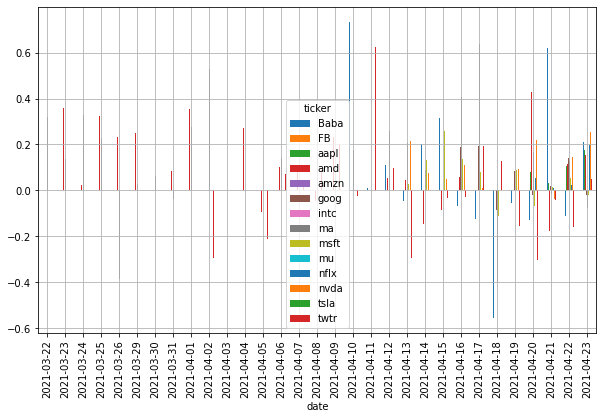

In [ ]:

plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()



In [ ]:
parsed_and_scored_news

,ticker,date,time,headline,neg,neu,pos,compound
0,tsla,2021-04-23,11:22AM,ARK Invest Stocks To Buy And Watch: 6 Stocks T...,0.000,1.000,0.000,0.0000
1,tsla,2021-04-23,10:02AM,10 Best Tech Stocks to Invest in For Long Term,0.000,0.682,0.318,0.6369
2,tsla,2021-04-23,09:35AM,Teslas autopilot easily tricked into driving w...,0.133,0.667,0.200,0.2023
3,tsla,2021-04-23,09:24AM,Senators Urge Action After Latest Tesla Crash ...,0.231,0.769,0.000,-0.4019
4,tsla,2021-04-23,09:19AM,"Stock Market Rally Retreats, Bitcoin Dives Ami...",0.000,0.755,0.245,0.6369
...,...,...,...,...,...,...,...,...
1395,twtr,2021-04-03,06:21AM,LinkedIn employees to get week off for well-being,0.000,1.000,0.000,0.0000
1396,twtr,2021-04-02,11:41AM,Twitter exec on diversity in tech: It is going...,0.000,1.000,0.000,0.0000
1397,twtr,2021-04-02,10:28AM,"Iran, U.S. to Hold Indirect Talks on Nuclear D...",0.000,1.000,0.000,0.0000
1398,twtr,2021-04-02,08:34AM,UPDATE 1-Russian court fines Twitter on charge...,0.351,0.649,0.000,-0.6597


In [ ]:
mean_scores.date=pd.to_datetime(mean_scores.index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
mean_scores.date

DatetimeIndex(['2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25',
               '2021-03-26', '2021-03-29', '2021-03-30', '2021-03-31',
               '2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-10', '2021-04-11', '2021-04-12',
               '2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16',
               '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20',
               '2021-04-21', '2021-04-22', '2021-04-23'],
              dtype='datetime64[ns]', name='date', freq=None)

In [ ]:
parsed_and_scored_news.date=pd.to_datetime(parsed_and_scored_news.date)

In [ ]:
import altair as alt

alt.data_transformers.disable_max_rows()


ticker=alt.binding_select(options=list(list(parsed_and_scored_news.ticker.unique())))
selection =alt.selection_single(fields=['ticker'], bind=ticker , name='ticker', init={"ticker":'nvda'})

brush_sel = alt.selection(type='interval', encodings=['x']) #opret areal markering

bottom=alt.Chart(parsed_and_scored_news).mark_bar(opacity=0.5).encode(
    alt.Y('compound:Q', stack=None),
    x='yearmonthdate(date):T',
    tooltip='ticker:N',
    color='ticker:N'

).properties(width=700,height=100).add_selection(
    brush_sel,
    
    
)

upper=bottom.mark_bar(opacity=0.5).encode(
    #alt.Y('compound:Q', stack=None),
    color=alt.condition(
        alt.datum.compound > 0, 
        alt.value('green'),
        alt.value('red'),
    #opacity = alt.condition(single_click, alt.value(1), alt.value(0.05)),
    
    ),
    tooltip='ticker:N',
).properties(width=700,height=100).transform_filter(
    brush_sel,

).transform_filter(

    selection
).add_selection(
    selection,
 
    
)

alt.vconcat(upper,bottom)

alt.VConcatChart(...)